# Introduction:

In this project, we will be working on a digit recognition problem using the popular MNIST dataset. The MNIST dataset consists of a large number of images of handwritten digits ranging from 0 to 9. Our goal is to develop a machine learning model that can accurately classify these images and correctly identify the digit that is being represented.

To accomplish this, we will be using a convolutional neural network (CNN), which is a type of deep learning algorithm that is particularly well-suited for image recognition tasks. We will be implementing our CNN using the Keras library in Python, which provides an easy-to-use interface for building and training deep learning models.

The accuracy of our model will be evaluated using a test set of images that the model has never seen before. Our ultimate goal is to develop a model that can achieve high accuracy on the test set, demonstrating its ability to generalize well to new, unseen data.

<img src="https://www.upgrad.com/blog/wp-content/uploads/2020/12/1-4.png">

# Table of Contents

* &nbsp; **[Introduction](#Introduction)**
    
* &nbsp; **[Import](#Import)**

* &nbsp; **[Load and Check Data](#Load-and-Check-Data)**
   
* &nbsp; **[Data Preparation](#Data-Preparation)**

    * &nbsp; **[Normalization](#Normalization)**
    
    * &nbsp; **[Reshape](#Reshape)**
    
    * &nbsp; **[Label Encoding](#Label-Encoding)**
    
    * &nbsp; **[Train Test Split](#Train-Test-Split)**
       

* &nbsp; **[Data Augmentation](#Data-Augmentation)**
    
* &nbsp; **[CNN Building](#CNN-Building)**

    * &nbsp; **[CNN Architecture](#CNN-Architecture)**
    
    * &nbsp; **[Set up Optimizer and Annealer](#Set-up-Optimizer-and-Annealer)**
    
    * &nbsp; **[Fit the Model](#Fit-the-Model)**

* &nbsp; **[Prediction](#Prediction)**


# Import:

In [1]:
# Install Kaleido package to transform plotly charts to svg and png format, so they are visible on GitHub
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.

import os
print(os.listdir("../input/digit-recognizer/"))

['sample_submission.csv', 'train.csv', 'test.csv']


# Load and Check Data

In [3]:
# Load train data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
display(train.head())
print(f"train shape: {train.shape}")

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train shape: (42000, 785)


In [4]:
# Load test data
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
display(test.head())
print(f"test shape: {test.shape}")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test shape: (28000, 784)


Get target:

In [5]:
# Put labels into y_train variable
y_train = train["label"]

# Drop "label" column
X_train = train.drop(labels = ["label"],axis = 1) 

Plot some samples:

In [6]:
def plot_img(index):
    # Reshape vector to 28x28 matrix
    img = X_train.iloc[index].to_numpy()
    img = img.reshape((28,28))

    # Create figure
    fig = px.imshow(img, color_continuous_scale='gray')

    # Set Title and x/y axis labels
    fig.update_layout(
        showlegend = False,
        #coloraxis_showscale=False,
        title={
            'text': f"Visualization of Image No.{index}",
            'y':0.95,
            'x':0.5
        }
    )
    # Display
    #fig.show() # for Kaggle version
    fig.show("png") # for GitHub version

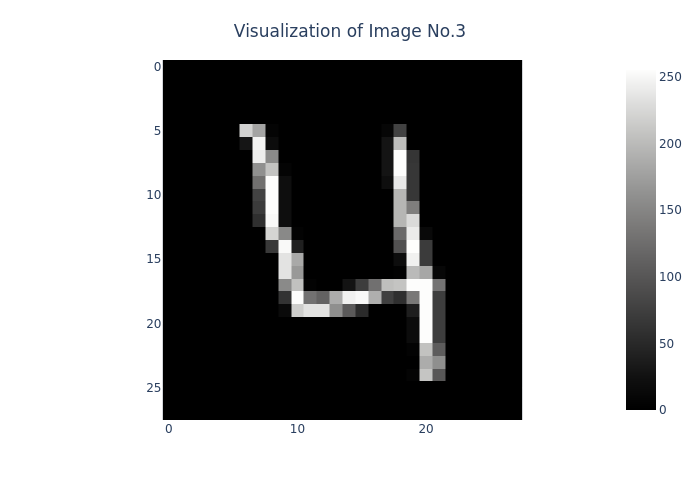

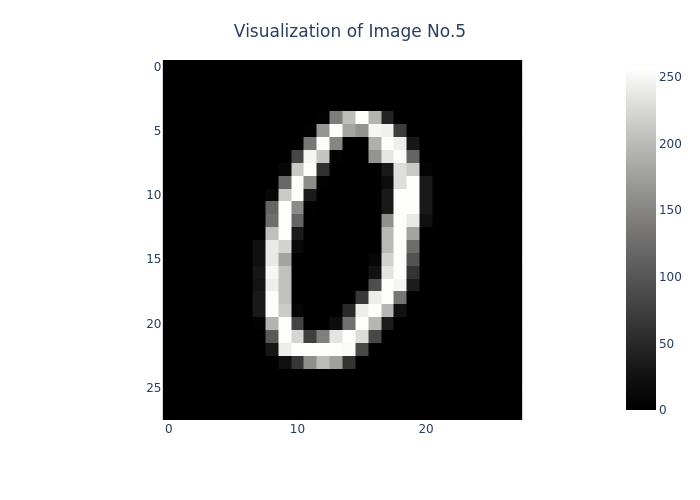

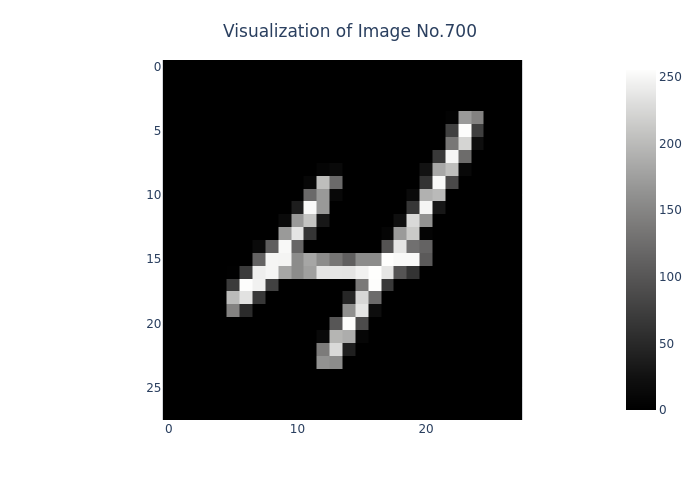

In [7]:
# Check some random values from train data
for index in (3, 5, 700):
    plot_img(index)

Check target distribution:

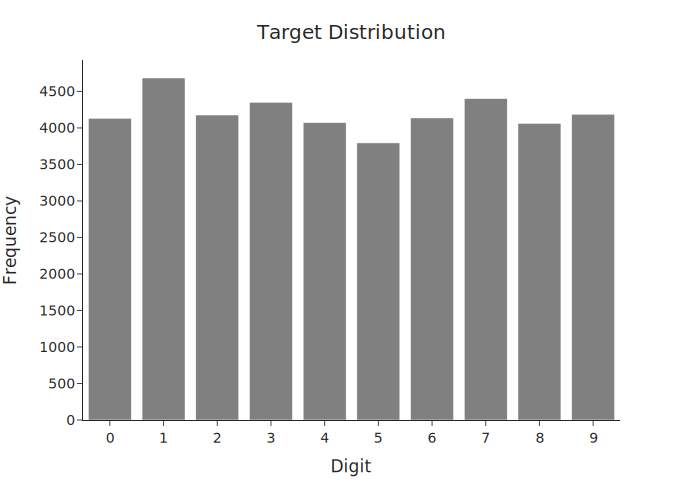

In [8]:
# Create figure
fig = px.bar(y_train.value_counts(),
             template='simple_white',
             color_discrete_sequence = ['grey']
            )

# Set Title and x/y axis labels
fig.update_layout(
    xaxis = dict(
        tickvals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ),
    xaxis_title="Digit",
    yaxis_title="Frequency",
    showlegend = False,
    font = dict(
            size = 14
            ),     
    title={
        'text': "Target Distribution",
        'y':0.95,
        'x':0.5
        }
    )

# Display
#fig.show() # for Kaggle version
fig.show("svg") # for GitHub version

# Data Preparation

## Normalization

Normalization:

* In order to reduce the impact of illumination differences on image analysis, we perform grayscale normalization.
* By normalizing the grayscale values of the images, we can ensure that the CNN is able to more accurately analyze and classify the images.
* Normalization can also help to improve the consistency of the image data, making it easier to train the model and achieve better performance.

CNN speed improvement through normalization:

* In addition to improving the accuracy of the CNN, normalization can also have a positive impact on the speed of the model.
* By reducing the variation in grayscale values across different images, the CNN can process the data more quickly and efficiently.

In [9]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"test shape: {test.shape}")

X_train shape: (42000, 784)
test shape: (28000, 784)


## Reshape

Reshape:

* In order to prepare our image data for use with a neural network, we need to reshape it into 3D matrices.
* Our original images are 28x28 pixels in size, so we reshape them into 28x28x1 matrices to add an extra dimension for channels.
* This is necessary because Keras, the deep learning library we are using, expects image data to be represented as 3D tensors with dimensions (width, height, channels).
* Since our images are grayscale, we only need one channel to represent them, hence the "1" in the last dimension of the reshaped matrix.

In [10]:
# Reshape
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

print(f"X_train shape: {X_train.shape}")
print(f"test shape: {test.shape}")

X_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


## Label Encoding

Label Encoding:

* In order to use categorical labels in our neural network, we need to encode them as numerical values.
* One common method for doing this is label encoding, where each unique label is assigned a unique integer value.
* However, since these numerical labels have an inherent ordering (e.g. 4 is "greater" than 2), they may not be suitable for use in certain types of models.
* To address this issue, we can use one-hot encoding to represent each label as a binary vector where only the corresponding label index is set to 1, and all other indices are set to 0.

In [11]:
# One-hot encoding
y_train = to_categorical(y_train, num_classes = 10)

## Train Test Split

Train Test Split:

* In order to evaluate the performance of our model and ensure that it can generalize well to new, unseen data, we need to split our dataset into separate training and testing sets.
* This is typically done by randomly selecting a portion of the data to use for testing and setting aside the rest for training.
* The size of the test and train sets can vary depending on the size of the dataset and other factors, but a common split is to use 80% of the data for training and 20% for testing.

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=11)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 28, 28, 1)
y_train shape: (33600, 10)
X_val shape: (8400, 28, 28, 1)
y_val shape: (8400, 10)


# Data Augmentation

Data augmentation is a commonly used technique to artificially expand the training dataset and reduce overfitting. Some of the common data augmentation techniques used in image recognition tasks are:

* Rotation: rotating the image by a certain degree to simulate variations in writing angles.
* Translation: shifting the image vertically or horizontally to simulate variations in position.
* Zooming: zooming in or out of the image to simulate variations in writing size.
* Shearing: distorting the image by shearing along the x or y-axis to simulate variations in writing style.

By applying these transformations randomly to the existing training images, we can create new training images that are similar to the original ones but have small variations, making the model more robust and less likely to overfit to the training data.

In [13]:
datagen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range = 0.10,  
    width_shift_range=0.1, 
    height_shift_range=0.1
)

datagen.fit(X_train)

# CNN Building

## CNN Architecture

CNN Architecture:

1. Convolutional Layer:
    * The first layer in our CNN is a Conv2D layer, which applies a set of learnable filters to the input image.
    * Each filter convolves over the input image, producing a feature map that captures different local features of the image.
    * In this model, I have chosen to use 32 filters for the first two Conv2D layers and 64 filters for the last two layers.
    * The size of the filters (kernel size) determines the size of the receptive field of the filter and the level of detail that it can capture.
    
    
2. Batch Normalization Layer:
    * Batch normalization is a technique used to normalize the inputs of each layer, improving the training speed and performance of the model.
    * In this model, I have added a BatchNormalization layer after each Conv2D layer and before the activation function.
    * This helps to stabilize the distribution of the inputs to each layer and reduces overfitting.
     
      
3. Activation Function:
    * In this model, I have used ReLU (Rectified Linear Unit) activation function in the Conv2D and Dense layers.
    * The ReLU activation function adds non-linearity to the network, allowing it to learn more complex features.  
    
    
4. Pooling Layer:
    * The pooling layer is used to reduce the spatial dimensions of the feature maps produced by the Conv2D layer.
    * In this model, I have used MaxPool2D layer, which selects the maximum value within a pool of adjacent pixels and downsamples the feature map.
    * By downsampling the feature maps, we can reduce the computational cost and improve the model's ability to generalize by reducing overfitting.
    * The size of the pooling window determines the level of downsampling applied to the feature maps.
    
 
5. Dropout Layer:
    * Dropout is a regularization technique that randomly ignores a proportion of nodes in the layer during training, forcing the network to learn features in a distributed way.
    * In this model, I have used Dropout layer to reduce overfitting and improve generalization.
    * The proportion of nodes to drop can be set using a dropout rate hyperparameter.
    
    
6. Flatten Layer:
    * The Flatten layer is used to convert the final feature maps produced by the Conv2D and pooling layers into a one-dimensional vector.
    * This is necessary to connect the CNN to the fully connected layers, which are artificial neural networks (ANN) classifiers.
    
 
7. Dense Layer:
    * The fully connected layers are used to classify the input image into one of the predefined classes.
    * In our model, we have used two Dense layers, one with 128 neurons, to extract high-level features from the flattened feature maps, and one with 10 neurons, to classify the image.
    * The final Dense layer has 10 neurons, one for each possible class, and uses softmax activation to output a probability distribution over the classes.

In [14]:
# Create CNN
model = Sequential()
        
model.add(Conv2D(filters=32, kernel_size=(5,5), 
                 activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size = (3,3),
                 activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

## Set up Optimizer and Annealer

Now that we have added layers to our model, we need to define a scoring function, a loss function, and an optimizer algorithm.
* For this project, we will use the Adam optimizer and cross-entropy loss function.
* To further improve our model's performance, we can also incorporate a learning rate annealer. This will gradually reduce the learning rate during training, allowing our model to converge more efficiently and reach better results.
* We can choose an appropriate annealing method, such as reducing the learning rate by a factor after a certain number of epochs or when the validation loss plateaus. By using an annealer, we can fine-tune the learning process and achieve better accuracy with our model.

In [15]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
# Set annealer
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

## Fit the Model

In [17]:
# set epochs and batch_size
epochs = 30
batch_size = 128

# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size), 
                    epochs = epochs, validation_data = (X_val,y_val),
                    verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[annealer],)

Epoch 1/30


2023-03-25 00:00:36.409802: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


262/262 - 24s - loss: 0.7799 - accuracy: 0.7537 - val_loss: 2.5343 - val_accuracy: 0.4229 - lr: 0.0010 - 24s/epoch - 90ms/step
Epoch 2/30
262/262 - 11s - loss: 0.2276 - accuracy: 0.9322 - val_loss: 0.1065 - val_accuracy: 0.9671 - lr: 9.5000e-04 - 11s/epoch - 43ms/step
Epoch 3/30
262/262 - 10s - loss: 0.1621 - accuracy: 0.9514 - val_loss: 0.0440 - val_accuracy: 0.9868 - lr: 9.0250e-04 - 10s/epoch - 39ms/step
Epoch 4/30
262/262 - 11s - loss: 0.1376 - accuracy: 0.9599 - val_loss: 0.0445 - val_accuracy: 0.9860 - lr: 8.5737e-04 - 11s/epoch - 42ms/step
Epoch 5/30
262/262 - 10s - loss: 0.1120 - accuracy: 0.9672 - val_loss: 0.0351 - val_accuracy: 0.9893 - lr: 8.1451e-04 - 10s/epoch - 39ms/step
Epoch 6/30
262/262 - 11s - loss: 0.0990 - accuracy: 0.9705 - val_loss: 0.0356 - val_accuracy: 0.9883 - lr: 7.7378e-04 - 11s/epoch - 41ms/step
Epoch 7/30
262/262 - 10s - loss: 0.0876 - accuracy: 0.9746 - val_loss: 0.0329 - val_accuracy: 0.9901 - lr: 7.3509e-04 - 10s/epoch - 38ms/step
Epoch 8/30
262/262 - 

In [18]:
history_df = pd.DataFrame(history.history)

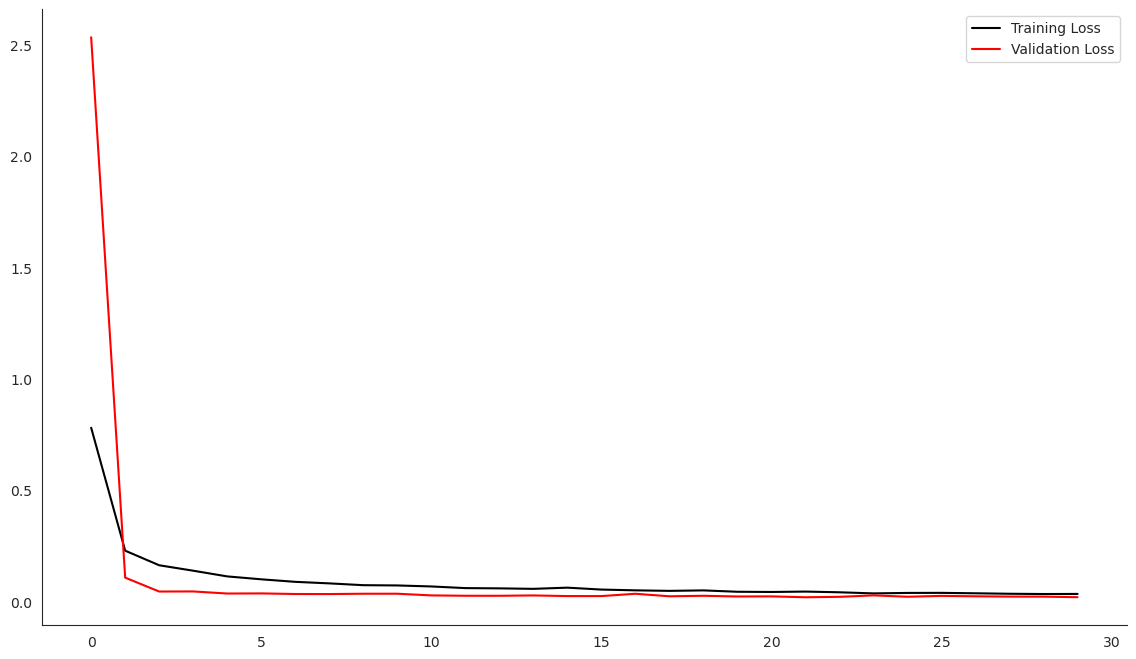

Minimum validation loss: 0.0182510893791914


In [19]:
plt.figure(figsize = (14, 8))
sns.set_style('white')

plt.plot(history.history['loss'], color='k', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")

plt.legend(['Training Loss', 'Validation Loss'])

sns.despine()
plt.show()

print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

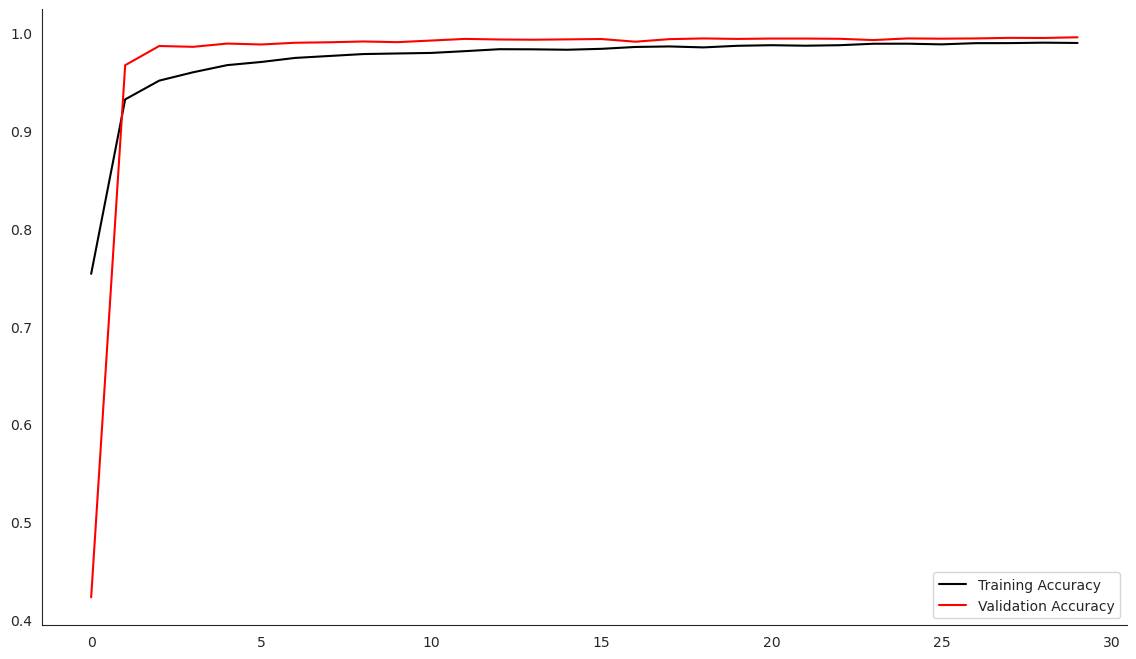

Maximum validation accuracy: 0.9957143068313599


In [20]:
plt.figure(figsize = (14, 8))
sns.set_style('white')

plt.plot(history.history['accuracy'], color='k', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")

plt.legend(['Training Accuracy', 'Validation Accuracy'])

sns.despine()
plt.show()

print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

# Prediction

In [21]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 2s 2ms/step


In [22]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions.to_csv("submission.csv", index=False, header=True)